In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random


#### Поиск остовного дерева минимального веса на динамических графах

Входные данные: 
1.	Связный граф не менее 50 вершин.
2.	Веса ребер в диапазоне от 1 до 10 случайным образом.


Задача 1.
1.	Построить остовное дерево минимального веса на графе, используя алгоритм Краскала.
2.	Визуализировать решение.


In [2]:
H = nx.path_graph(10)

{(1, 0): Text(-0.03718053185005332, -0.5772127723782565, '5'),
 (1, 2): Text(-0.008295519265569588, -0.683352871125306, '1'),
 (2, 3): Text(-0.017927452055827877, -0.8230120323733903, '5'),
 (3, 4): Text(-0.04293622872528384, -0.8131899156575713, '5'),
 (4, 5): Text(-0.07989162060347707, -0.7461180991079372, '10'),
 (5, 6): Text(-0.14021514037088142, -0.7026214869536083, '10'),
 (6, 7): Text(-0.22447277522760622, -0.6723307948344917, '8'),
 (7, 8): Text(-0.3412332631162943, -0.6277279540926433, '3'),
 (8, 9): Text(-0.45252111119671495, -0.5748567181101933, '8'),
 (9, 10): Text(-0.5273821712597956, -0.5284052513846985, '9'),
 (10, 11): Text(-0.5852990496750835, -0.4726307618795672, '8'),
 (11, 12): Text(-0.6086711627536019, -0.39650176012046817, '6'),
 (12, 13): Text(-0.5830101458162167, -0.31182517363329176, '6'),
 (13, 14): Text(-0.532061614112569, -0.24120027906876762, '9'),
 (14, 15): Text(-0.4827752142315537, -0.18033471776892723, '9'),
 (15, 16): Text(-0.45476656101597795, -0.1085

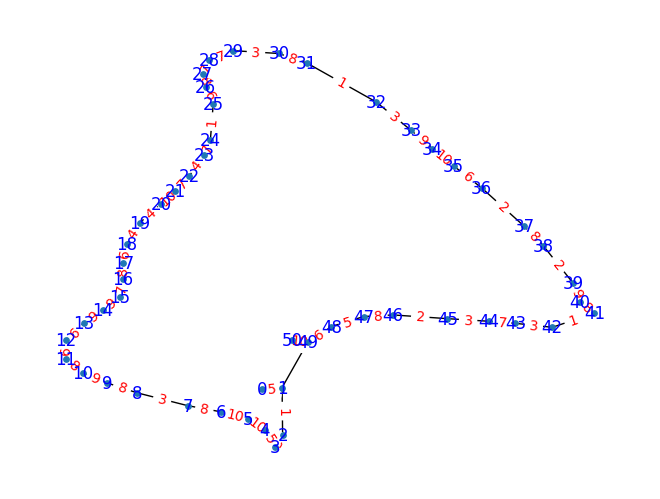

In [43]:
G = nx.Graph()

random_peaks = [i+1 for i in range(50)]


G.add_nodes_from(random_peaks)

random_edges = [(x, y, random.randint(1, 10)) for x, y in enumerate(random_peaks)]
G.add_weighted_edges_from(random_edges)


g_layout = nx.spring_layout(G)

nx.draw(G, pos=g_layout, with_labels=True, font_weight="medium", node_size=15, font_color="blue")
edge_labels = nx.get_edge_attributes(G, "weight")

nx.draw_networkx_edge_labels(G, pos=g_layout, edge_labels=edge_labels, font_color="red")




{}


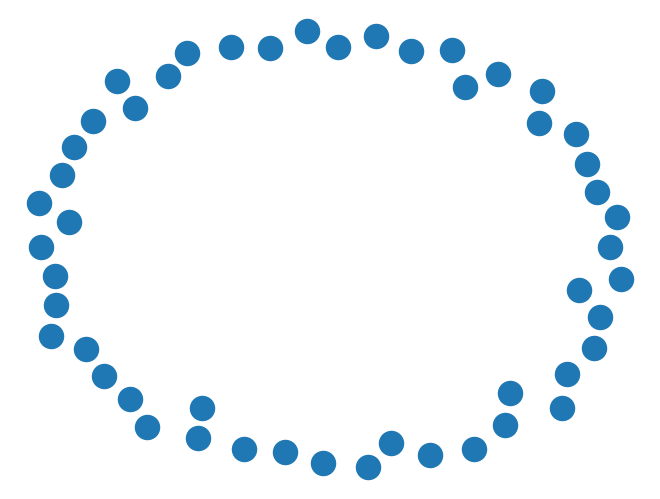

In [28]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# create an empty graph
G = nx.Graph()

# add 50 peaks to the graph
for i in range(50):
    G.add_node(i)

# add edges with random weights from 1 to 10
for u, v in G.edges():
    G[u][v]['weight'] = random.randint(1, 10)

# create a layout for the graph
pos = nx.spring_layout(G)

# draw the graph and label the edges with their weights
nx.draw(G, pos)
labels = nx.get_edge_attributes(G, 'weight')
print(labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# show the graph
plt.show()

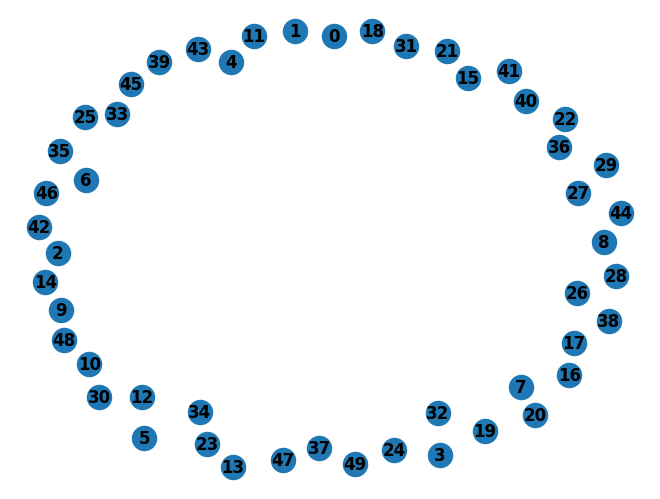

In [29]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# Create a graph with 50 nodes
G = nx.Graph()
for i in range(50):
    G.add_node(i)

# Add edges with random weights from 1 to 10
for u, v in G.edges():
    G[u][v]['weight'] = random.randint(1,10)

# Draw the graph with edge labels
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)

# Show the graph and edge labels
plt.show()

[(0, 1, {'weight': 9}), (0, 2, {'weight': 4}), (0, 3, {'weight': 10}), (0, 4, {'weight': 7}), (0, 5, {'weight': 1}), (0, 6, {'weight': 6}), (0, 7, {'weight': 5}), (0, 8, {'weight': 4}), (0, 9, {'weight': 4}), (0, 10, {'weight': 10}), (0, 11, {'weight': 3}), (0, 12, {'weight': 5}), (0, 13, {'weight': 2}), (0, 14, {'weight': 1}), (0, 15, {'weight': 5}), (0, 16, {'weight': 3}), (0, 17, {'weight': 5}), (0, 18, {'weight': 8}), (0, 19, {'weight': 5}), (0, 20, {'weight': 10}), (0, 21, {'weight': 4}), (0, 22, {'weight': 2}), (0, 23, {'weight': 6}), (0, 24, {'weight': 1}), (0, 25, {'weight': 1}), (0, 26, {'weight': 10}), (0, 27, {'weight': 7}), (0, 28, {'weight': 6}), (0, 29, {'weight': 2}), (0, 30, {'weight': 8}), (0, 31, {'weight': 9}), (0, 32, {'weight': 6}), (0, 33, {'weight': 5}), (0, 34, {'weight': 9}), (0, 35, {'weight': 7}), (0, 36, {'weight': 7}), (0, 37, {'weight': 2}), (0, 38, {'weight': 3}), (0, 39, {'weight': 3}), (0, 40, {'weight': 8}), (0, 41, {'weight': 6}), (0, 42, {'weight': 9

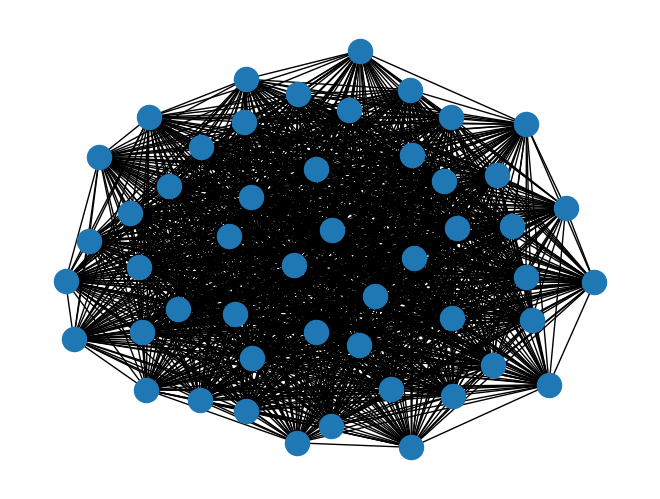

In [15]:
import networkx as nx
import random

# create an empty graph
G = nx.Graph()

# add 50 nodes
for i in range(50):
    G.add_node(i)

# add edges with random weights
for i in range(50):
    for j in range(i+1, 50):
        weight = random.randint(1, 10)
        G.add_edge(i, j, weight=weight)

# print the graph
print(G.edges(data=True))
nx.draw(G)

{}

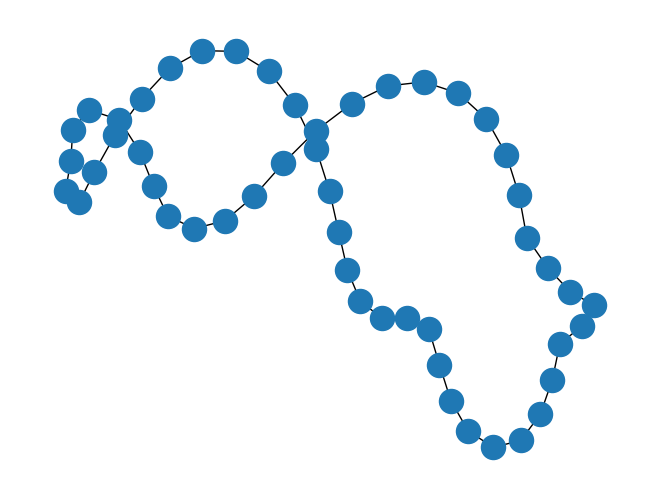

In [21]:
G = nx.cycle_graph(50)


nx.draw(G)


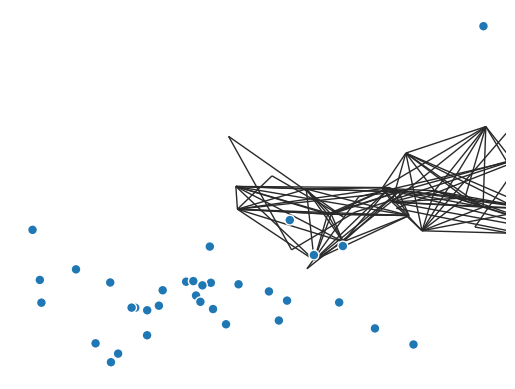

In [13]:
import numpy as np
from grave import grave


graph = nx.barbell_graph(10, 14)
nx.set_node_attributes(graph, dict(graph.degree()), 'degree')


def random_constrained_layout(networkx):
    """
    Let's build my own layout. It's going to be random, except for a handful
    of points!
    """
    n_nodes = len(graph.nodes.data())
    random_state = np.random.RandomState(seed=0)
    xy = random_state.randn(n_nodes, 2)
    xy[0] = [0, 0]
    xy[10] = [+3, 8]

    return {k: xy[k] for k in graph.nodes.keys()}


fig, ax = plt.subplots()
grave.plot_network(graph, ax=ax, layout=random_constrained_layout)
plt.show()

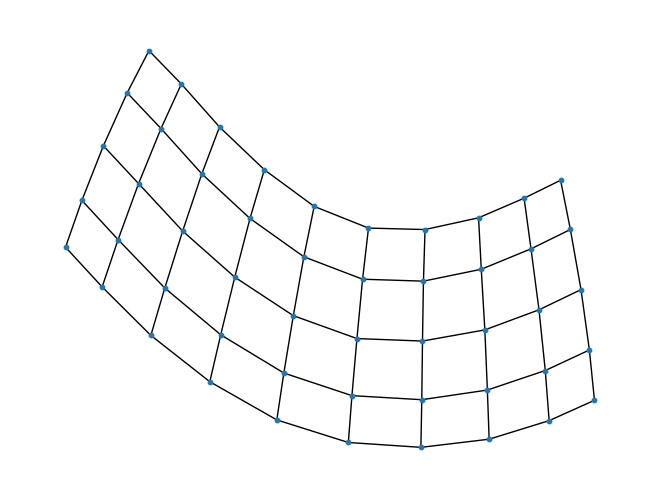

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

n = 10  # 10 nodes
m = 50  # 20 edges
seed = 3  # seed random number generators for reproducibility

# Use seed for reproducibility
G = nx.grid_2d_graph(10, 5)

# some properties
# print("node degree clustering")
# for v in nx.nodes(G):
    # print(f"{v} {nx.degree(G, v)} {nx.clustering(G, v)}")

# print()|
# print("the adjacency list")
# for line in nx.generate_adjlist(G):
#     print(line)

pos = nx.spring_layout(G, seed=seed)  # Seed for reproducible layout
nx.draw(G, pos=pos, node_size=10)
plt.show()

{(0, 1): Text(-0.476634557597144, 0.27091894205316513, '9'),
 (0, 49): Text(-0.4375475587434984, 0.3033395400296064, '7'),
 (1, 2): Text(-0.5565536021528794, 0.2630740370919953, '1'),
 (2, 3): Text(-0.5767766992927974, 0.6322525620325083, '0'),
 (3, 4): Text(-0.5371369826904842, 0.9729858544304686, '4'),
 (4, 5): Text(-0.5494388163127315, 0.9205692530976426, '3'),
 (5, 6): Text(-0.5878178544773119, 0.8937581273843549, '4'),
 (6, 7): Text(-0.03792507199670703, 0.4705768755942704, '0'),
 (7, 8): Text(0.5403453724274234, 0.030718215349766806, '10'),
 (8, 9): Text(0.558885580963314, -0.05128391542187653, '1'),
 (9, 10): Text(0.5765239256345549, -0.14016211453093194, '9'),
 (10, 11): Text(0.5845079313174877, -0.23706210280680967, '1'),
 (11, 12): Text(0.5753779774646791, -0.3467054708531497, '3'),
 (12, 13): Text(0.5083174958115225, -0.42376038682055345, '1'),
 (13, 14): Text(0.38019971822662, -0.46765799930803215, '1'),
 (14, 15): Text(0.2675681992392978, -0.4631818994013947, '5'),
 (15, 1

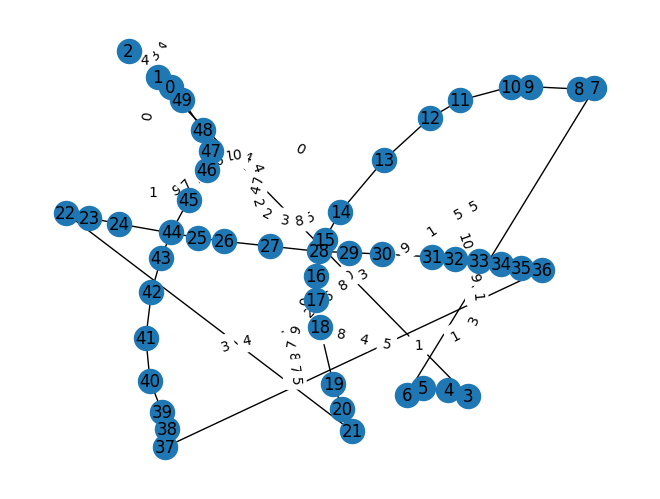

In [8]:
G = nx.cycle_graph(50)

for (u, v) in G.edges():
    G[u][v]['weight'] = random.randint(0, 10)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, with_labels=True)
nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G), edge_labels=edge_labels)

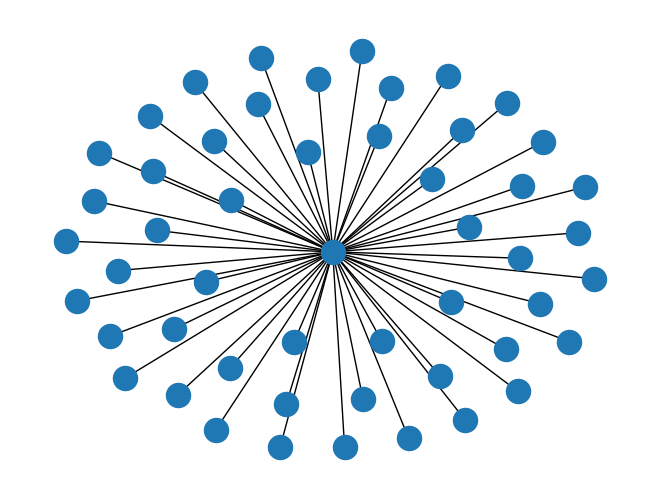

In [65]:
G = nx.star_graph(50)
nx.draw(G)

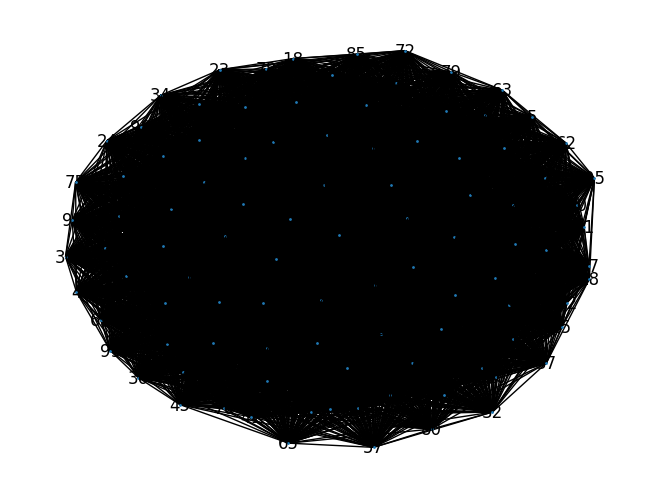

In [73]:
G = nx.complete_graph(100)
nx.draw(G, with_labels=True, node_size=1)

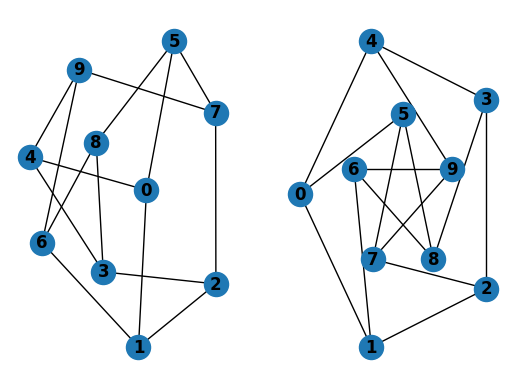

In [45]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight="bold")
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')